# Importing Packages

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Loading the Dataset

In [0]:
df=pd.read_excel('matchstats.xlsx')

# EDA

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,FTR
0,E0,19/08/00,Charlton,Man City,4,0,2,0,H,Rob Harris,17,8,14,4,13,12,6,6,1,2,0,0,0
1,E0,19/08/00,Chelsea,West Ham,4,2,1,0,H,Graham Barber,17,12,10,5,19,14,7,7,1,2,0,0,0
2,E0,19/08/00,Coventry,Middlesbrough,1,3,1,1,D,Barry Knight,6,16,3,9,15,21,8,4,5,3,1,0,1
3,E0,19/08/00,Derby,Southampton,2,2,1,2,A,Andy D'Urso,6,13,4,6,11,13,5,8,1,1,0,0,2
4,E0,19/08/00,Leeds,Everton,2,0,2,0,H,Dermot Gallagher,17,12,8,6,21,20,6,4,1,3,0,0,0


In [5]:
df.shape

(7220, 23)

In [6]:
df.describe

<bound method NDFrame.describe of      Div                 Date     HomeTeam       AwayTeam  ...  AY  HR  AR  FTR
0     E0             19/08/00     Charlton       Man City  ...   2   0   0    0
1     E0             19/08/00      Chelsea       West Ham  ...   2   0   0    0
2     E0             19/08/00     Coventry  Middlesbrough  ...   3   1   0    1
3     E0             19/08/00        Derby    Southampton  ...   1   0   0    2
4     E0             19/08/00        Leeds        Everton  ...   3   0   0    0
...   ..                  ...          ...            ...  ...  ..  ..  ..  ...
7215  E0  2019-12-05 00:00:00    Liverpool         Wolves  ...   2   0   0    0
7216  E0  2019-12-05 00:00:00   Man United        Cardiff  ...   3   0   0    1
7217  E0  2019-12-05 00:00:00  Southampton   Huddersfield  ...   1   0   0    2
7218  E0  2019-12-05 00:00:00    Tottenham        Everton  ...   2   0   0    2
7219  E0  2019-12-05 00:00:00      Watford       West Ham  ...   0   1   0    1

[7220

In [0]:
# droping uncessary
df=df.drop('Div',axis=1)

In [8]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,FTR
0,19/08/00,Charlton,Man City,4,0,2,0,H,Rob Harris,17,8,14,4,13,12,6,6,1,2,0,0,0
1,19/08/00,Chelsea,West Ham,4,2,1,0,H,Graham Barber,17,12,10,5,19,14,7,7,1,2,0,0,0
2,19/08/00,Coventry,Middlesbrough,1,3,1,1,D,Barry Knight,6,16,3,9,15,21,8,4,5,3,1,0,1
3,19/08/00,Derby,Southampton,2,2,1,2,A,Andy D'Urso,6,13,4,6,11,13,5,8,1,1,0,0,2
4,19/08/00,Leeds,Everton,2,0,2,0,H,Dermot Gallagher,17,12,8,6,21,20,6,4,1,3,0,0,0


## Encoding 

In [0]:

df.loc[df['HTR']=='H', 'HTR']=0
df.loc[df['HTR']=='A', 'HTR']=1
df.loc[df['HTR']=='D', 'HTR']=2

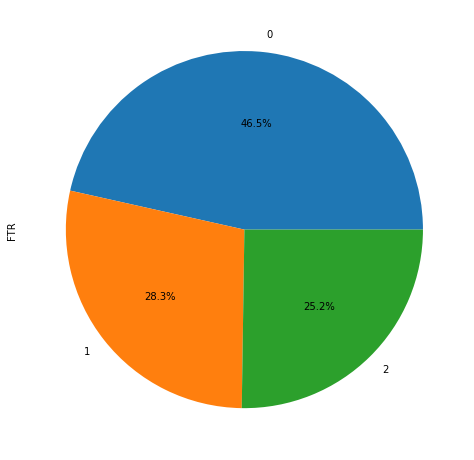

In [10]:
# Poloting pie chart for full time result
plt.figure(figsize=(8,14))
df['FTR'].value_counts('0').plot.pie(autopct='%1.1f%%')

### Data shows that about 46.5% of the teams who play home wins the match

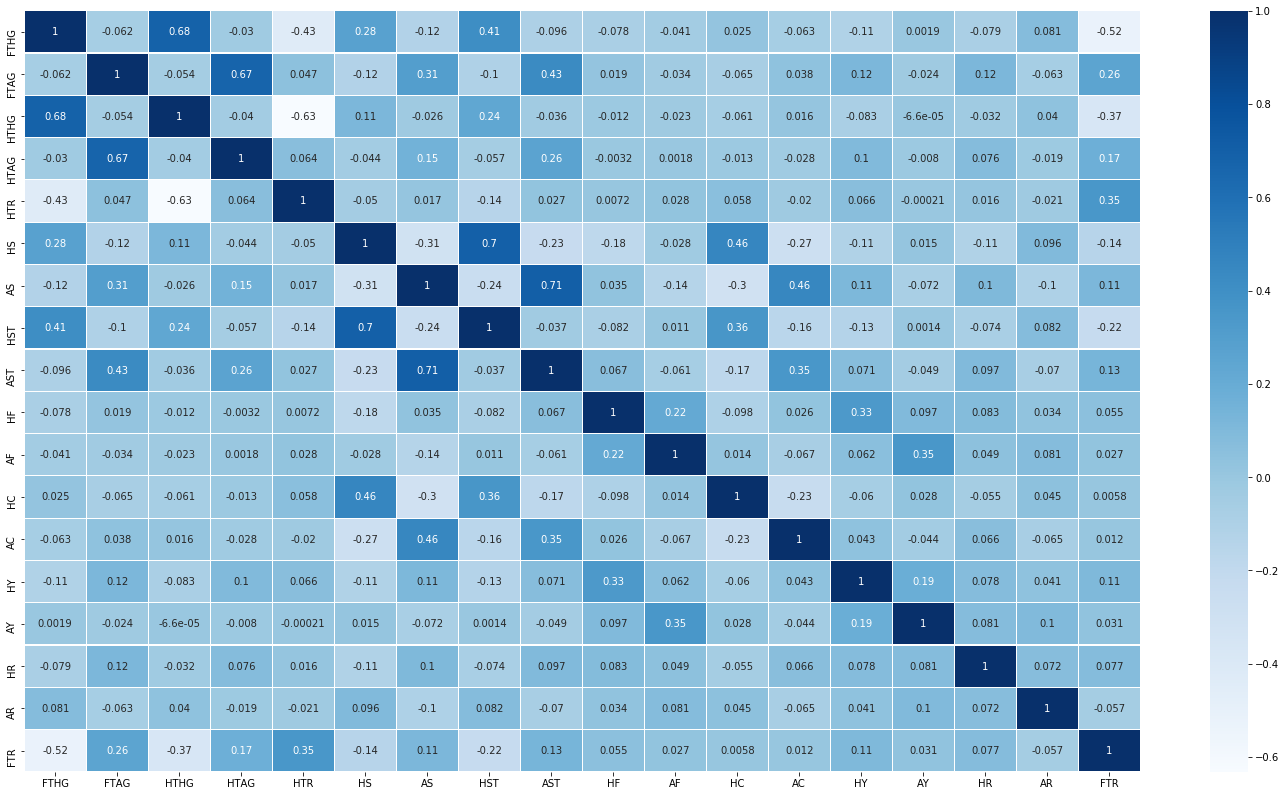

In [13]:
plt.figure(figsize=(25,14))
sns.heatmap(df.corr(),annot=True,cmap='Blues',linewidths=0.1) 
fig=plt.gcf()
plt.show()

In [15]:
corr_sale = df.corr().FTR
corr_field = corr_sale.sort_values(ascending = False).head(11)
corr_field

FTR     1.000000
HTR     0.352425
FTAG    0.259147
HTAG    0.172144
AST     0.134305
AS      0.114722
HY      0.105004
HR      0.077463
HF      0.055073
AY      0.031239
AF      0.027042
Name: FTR, dtype: float64

Text(0, 0.5, 'Total Away Shots on Target')

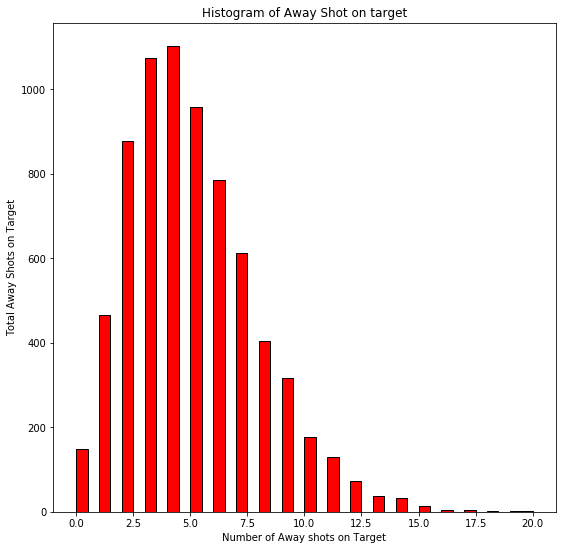

In [16]:
plt.figure(figsize=(9,9))
plt.hist(df['AST'], color = 'red', edgecolor='black', bins= int(200/5))

plt.title('Histogram of Away Shot on target')
plt.xlabel('Number of Away shots on Target')
plt.ylabel('Total Away Shots on Target')

Text(0, 0.5, 'Total Home Shots on Target')

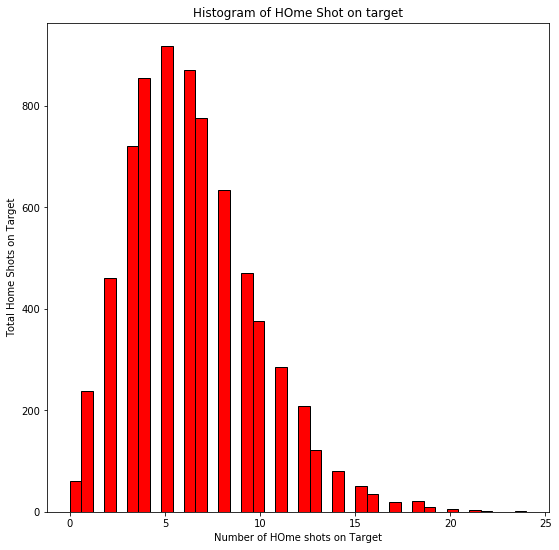

In [17]:
plt.figure(figsize=(9,9))
plt.hist(df['HST'], color = 'red', edgecolor='black', bins= int(200/5))

plt.title('Histogram of HOme Shot on target')
plt.xlabel('Number of HOme shots on Target')
plt.ylabel('Total Home Shots on Target')

In [18]:
#encodinng Data using get_dummies function

newX=pd.get_dummies(df)
newX.head()

,FTHG,FTAG,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,FTR,Date_2000-01-10 00:00:00,Date_2000-02-12 00:00:00,Date_2000-03-12 00:00:00,Date_2000-04-11 00:00:00,Date_2000-04-12 00:00:00,Date_2000-05-09 00:00:00,Date_2000-05-11 00:00:00,Date_2000-06-09 00:00:00,Date_2000-06-11 00:00:00,Date_2000-09-09 00:00:00,Date_2000-09-12 00:00:00,Date_2000-10-09 00:00:00,Date_2000-10-12 00:00:00,Date_2000-11-09 00:00:00,Date_2000-11-11 00:00:00,Date_2000-12-11 00:00:00,Date_2001-01-01 00:00:00,Date_2001-01-04 00:00:00,Date_2001-01-05 00:00:00,Date_2001-01-12 00:00:00,Date_2001-02-01 00:00:00,Date_2001-02-04 00:00:00,...,Referee_R Martin,Referee_R Styles,Referee_R. Styles,"Referee_Rennie, U. D.","Referee_Riley, M. A.",Referee_Rob Harris,Referee_Rob Styles,Referee_Roy Burton,Referee_S Attwell,Referee_S Bennett,Referee_S Dunn,Referee_S Hooper,Referee_S Tanner,Referee_S. G. Bennett,Referee_S. W. Dunn,Referee_S. W. Dunn,Referee_St Bennett,Referee_Steve Bennett,Referee_Steve Bennett,Referee_Steve Dunn,Referee_Steve Lodge,"Referee_Styles, R","Referee_Styles, R.",Referee_U Rennie,Referee_U. D. Rennie,"Referee_Wiley, A. G.","Referee_Wilkes, C. R.","Referee_Winter, J. T.","Referee_Wolstenholme, E. K.","Referee_Yates, N",Referee_l Mason,Referee_ A D'Urso,Referee_ A Wiley,Referee_ C Foy,Referee_ D Gallagher,Referee_ H Webb,Referee_ M Atkinson,Referee_ N Barry,Referee_ S Dunn,Referee_ U Rennie
0,4,0,2,0,0,17,8,14,4,13,12,6,6,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,2,1,0,0,17,12,10,5,19,14,7,7,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,3,1,1,2,6,16,3,9,15,21,8,4,5,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,2,1,2,1,6,13,4,6,11,13,5,8,1,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,2,0,0,17,12,8,6,21,20,6,4,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
newX=newX.reset_index()

In [0]:
newX.fillna(0,inplace=True)

In [0]:
newX=newX.drop('FTHG', axis=1)
newX=newX.drop('FTAG', axis=1)

In [0]:
# FTR Feature represent the full time result so it is taken as target

Y =newX['FTR']
X =newX.loc[:,newX.columns!='FTR']